In [ ]:
!pip install kneed

In [ ]:
import pandas as pd
import numpy as np
from math import * 
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from topsis import TOPSIS

In [ ]:
def elbow(X, sup):
    sse = []
    sup=sup
    p=range(1,sup+1)
    for k in p:
  
        kmeans = KMeans(n_clusters=k, n_init = 1000, max_iter = 20)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.style.use("fivethirtyeight")
    plt.plot(p, sse)
    plt.xticks(p)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    kn = KneeLocator(p, sse, curve='convex', direction='decreasing')
    kn.plot_knee()

def silouhette(X, sup):
    s_score = []
    for i in range(2,sup+1):
        km = KMeans(n_clusters = i , n_init = 1000, max_iter = 1000)
        km.fit_predict(X)
        # Calculate Silhoutte Score
        score = silhouette_score(X, km.labels_)
        s_score.append(score)
    
    fig, ax = plt.subplots()

    ax.plot([i for i in range(2,sup+1)], s_score)


In [ ]:
#getting Data
g = nx.karate_club_graph()
# centrality measures & node ranking
data = TOPSIS(g)
data.drop(columns=['TOPSIS'], inplace=True)
data.set_index('node', inplace = True)
measures = data.values
#adjacency matrix
mat = nx.to_numpy_array(g, nodelist=[ i for i in range(34)])

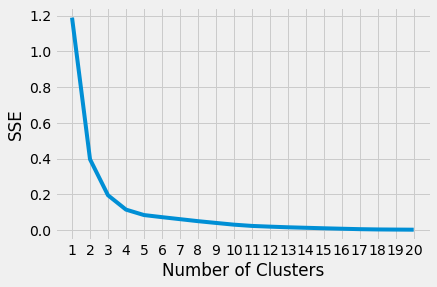

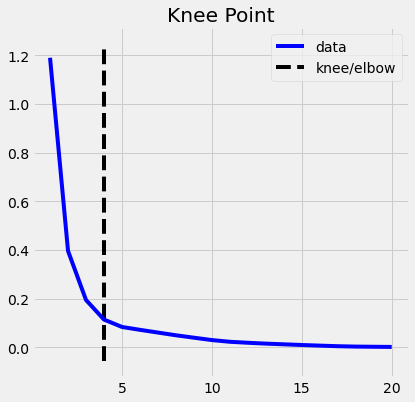

In [ ]:
elbow(measures, 20)

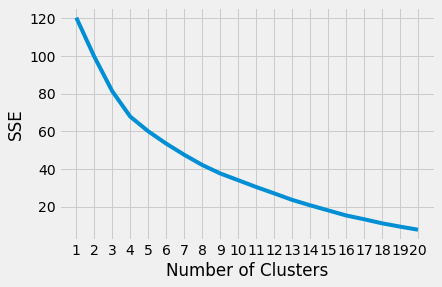

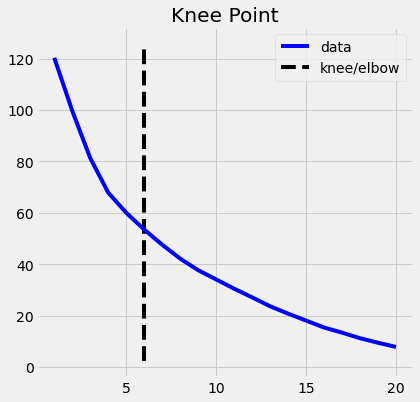

In [ ]:
elbow(mat,20)

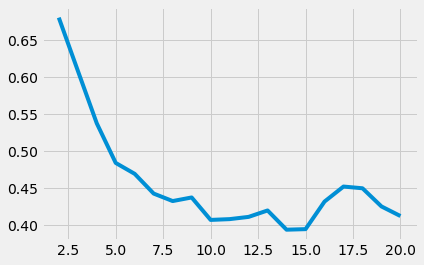

In [ ]:
silouhette(measures, 20)

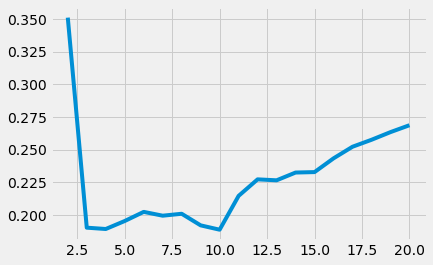

In [ ]:
silouhette(mat, 20)

# K-means with k found using silouhette method (2)

In [ ]:
measures = data.sort_index().values
mat = nx.to_numpy_array(g, nodelist=[i for i in range(34)])

In [ ]:
X = {'measures' : measures,'matrix' : mat}

# true values
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
result = pd.DataFrame(y_true, columns = ['y_true'])

# k-means 
for x in X:
    km = KMeans(n_clusters = 2, max_iter = 1000)
    cluster = km.fit_predict(X[x])
    result[x] = cluster



# Comparison between the results and the true values

In [ ]:
# centrality measures
sqrt(sum((result['y_true'] - result['measures']) ** 2))

4.242640687119285

In [ ]:
# adjacency matrix
sqrt(sum((result['y_true'] - result['matrix']) ** 2))

0.0